1. Importing required libraries

In [44]:
# Importing libraries with multiple algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, validation_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
import time
warnings.filterwarnings('ignore')

2. Dataset Loading

In [45]:
df = pd.read_csv('Airline_train.csv') # Loading dataset

3. Exploring the dataset

In [46]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Description:")
print(df.describe())

Dataset shape: (103904, 25)
Columns: ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                     

4. Check for missing values

In [47]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes

In [48]:
# Handling missing values
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True) # Filling delays with median value

In [49]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                    

5. Check target variable distribution

In [50]:
print("\nTarget variable distribution:")
print(df['satisfaction'].value_counts())  # Show happy vs unhappy passengers
print("\nTarget percentages:")
print(df['satisfaction'].value_counts(normalize=True) * 100)


Target variable distribution:
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

Target percentages:
satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64


6. Data Visualizations

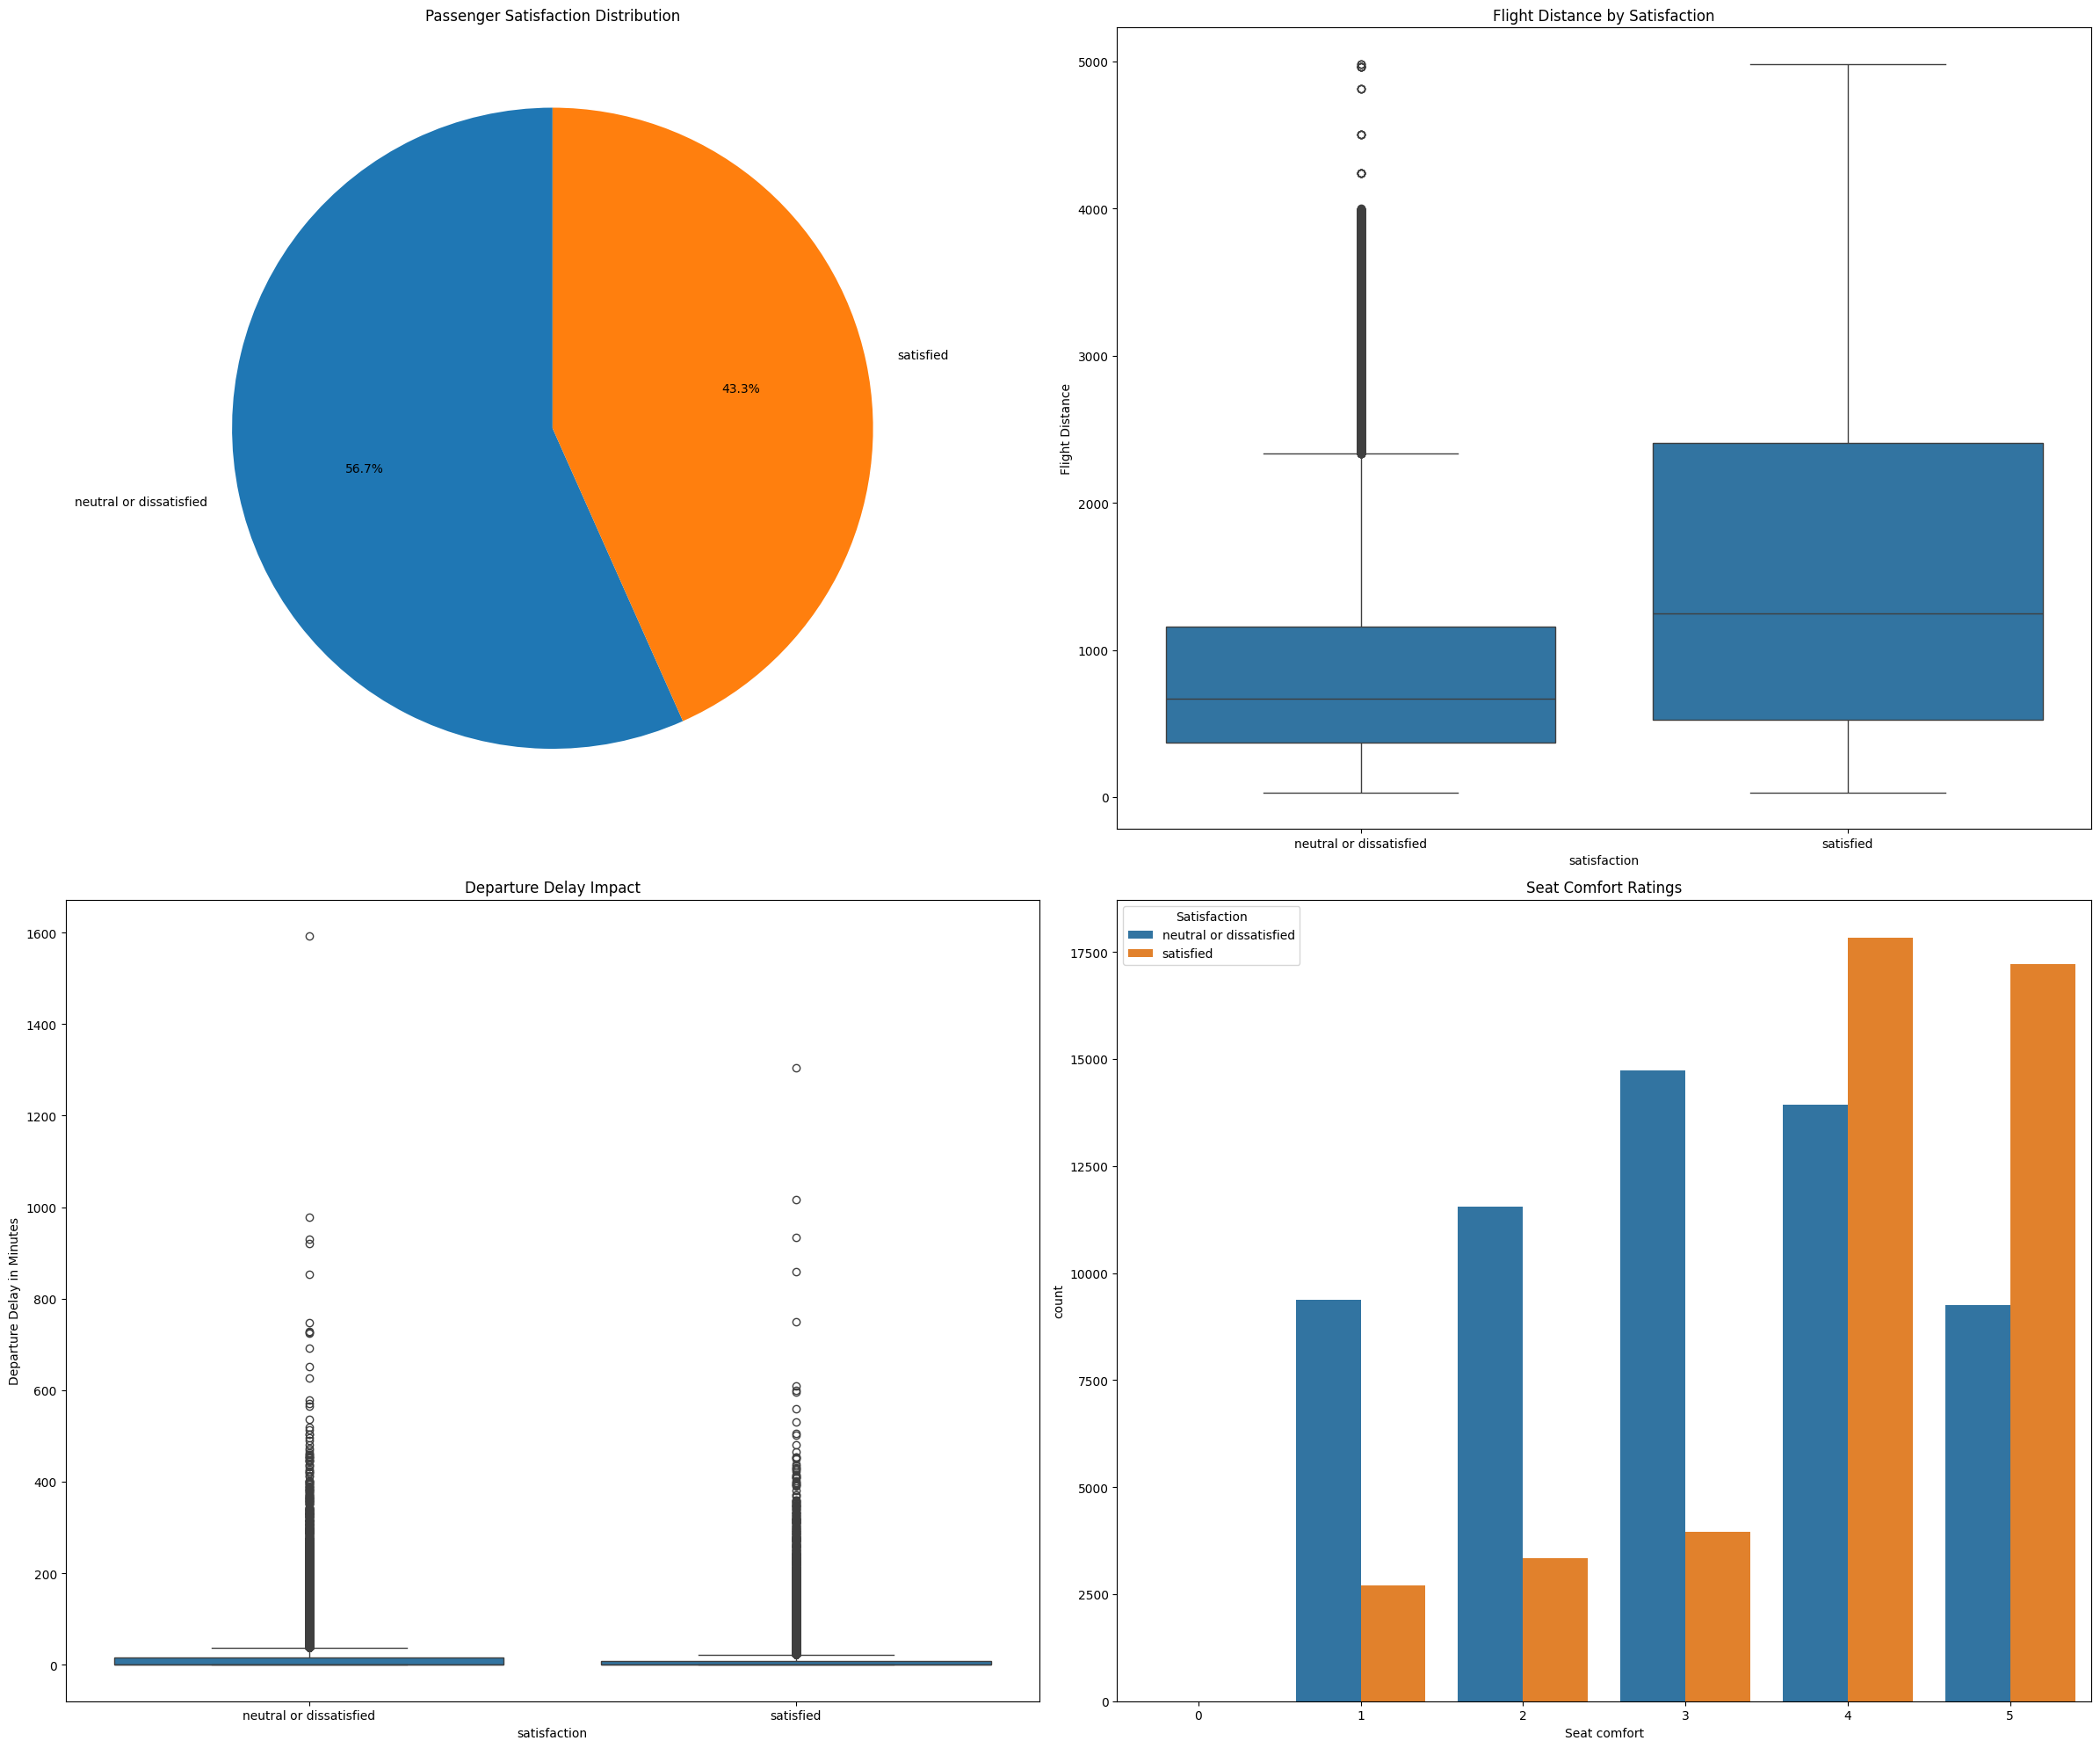

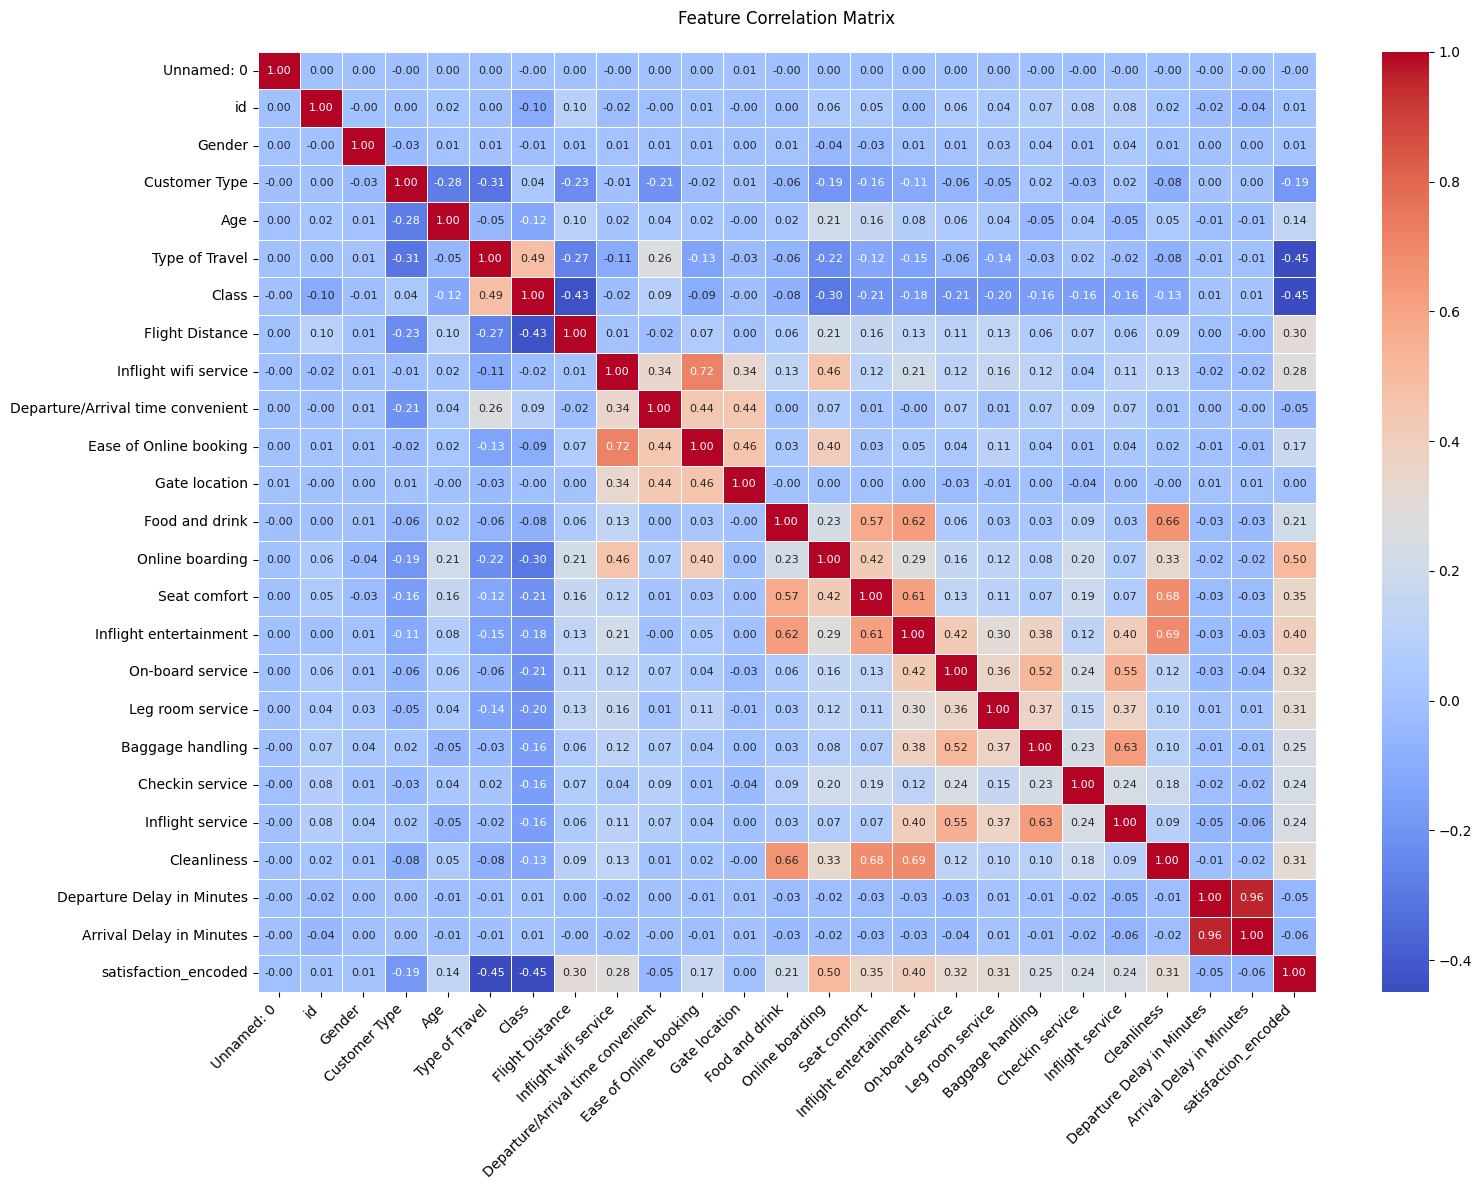

In [51]:
# Setting up the plotting style
plt.figure(figsize=(24, 20))

# Visualization 1: Target distribution
plt.subplot(2, 2, 1)
satisfaction_counts = df['satisfaction'].value_counts()
plt.pie(satisfaction_counts.values,
        labels=satisfaction_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Passenger Satisfaction Distribution')

# Visualization 2: Flight distance vs satisfaction
plt.subplot(2, 2, 2)
sns.boxplot(x='satisfaction', y='Flight Distance', data=df)
plt.title('Flight Distance by Satisfaction')

# Visualization 3: Departure delay vs satisfaction
plt.subplot(2, 2, 3)
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df)
plt.title('Departure Delay Impact')

# Visualization 4: Seat comfort rating
plt.subplot(2, 2, 4)
sns.countplot(x='Seat comfort', hue='satisfaction', data=df)
plt.title('Seat Comfort Ratings')
plt.legend(title='Satisfaction')

plt.tight_layout()
plt.show()

# Visualization 5: Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df_numeric.drop('satisfaction', axis=1).corr()
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            annot_kws={'size': 8},
            linewidths=0.5)
plt.title('Feature Correlation Matrix', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

7. Data Preprocessing

In [52]:
# Prepare features and target
X = df.drop(['satisfaction', 'id'], axis=1)  # Dropping ID as it's not a feature
y = df['satisfaction']

# Convert text categories to numbers
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Convert satisfaction to 0/1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded classes: {np.unique(y_encoded)}")

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Original classes: ['neutral or dissatisfied' 'satisfied']
Encoded classes: [0 1]

Training set size: (72732, 28)
Test set size: (31172, 28)


8. Standarization

In [54]:
# Scale features to similar ranges for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit to training data
X_test_scaled = scaler.transform(X_test) # Apply same scaling to test


9. Finding Optimal K for KNN


Testing k values: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]

Optimal k value: 7
Best validation accuracy: 0.9224


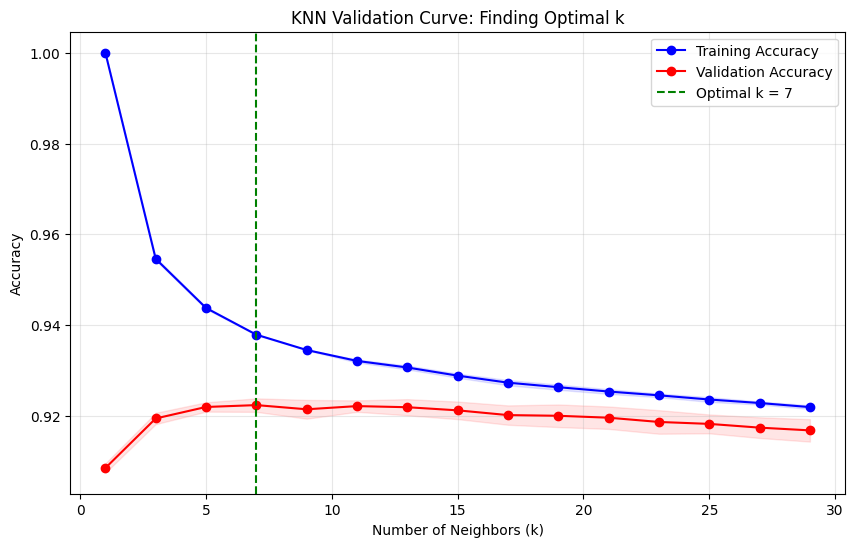

In [55]:
# Test different number of neighbors (k) to find the best one
k_range = np.arange(1, 31, 2)
print(f"Testing k values: {k_range}")

# Check accuracy for each k value using 5-fold cross-validation
train_scores, val_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train,
    param_name='n_neighbors', param_range=k_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate average scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Find k with highest validation accuracy
optimal_k_idx = np.argmax(val_mean)
optimal_k = k_range[optimal_k_idx]

print(f"\nOptimal k value: {optimal_k}")
print(f"Best validation accuracy: {val_mean[optimal_k_idx]:.4f}")

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(k_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(k_range, val_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(k_range, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Validation Curve: Finding Optimal k')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

10. Model Implementation


In [56]:
# Create dictionary of different models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'SVM (Polynomial)': SVC(kernel='poly', degree=3, random_state=42),
    'SVM (Sigmoid)': SVC(kernel='sigmoid', random_state=42),
    'K-Nearest Neighbors (Default)': KNeighborsClassifier(n_neighbors=5),
    f'K-Nearest Neighbors (Optimal k={optimal_k})': KNeighborsClassifier(n_neighbors=optimal_k)
}

11. Cross Validation

Evaluating Logistic Regression...
  CV Accuracy: 0.8752 (+/- 0.0075)
Evaluating Naive Bayes...
  CV Accuracy: 0.8488 (+/- 0.0066)
Evaluating Decision Tree...
  CV Accuracy: 0.9425 (+/- 0.0035)
Evaluating Random Forest...
  CV Accuracy: 0.9614 (+/- 0.0028)
Evaluating SVM (Linear)...
  CV Accuracy: 0.8769 (+/- 0.0090)
Evaluating SVM (RBF)...
  CV Accuracy: 0.9518 (+/- 0.0049)
Evaluating SVM (Polynomial)...
  CV Accuracy: 0.9384 (+/- 0.0057)
Evaluating SVM (Sigmoid)...
  CV Accuracy: 0.7744 (+/- 0.0084)
Evaluating K-Nearest Neighbors (Default)...
  CV Accuracy: 0.9222 (+/- 0.0061)
Evaluating K-Nearest Neighbors (Optimal k=7)...
  CV Accuracy: 0.9225 (+/- 0.0068)


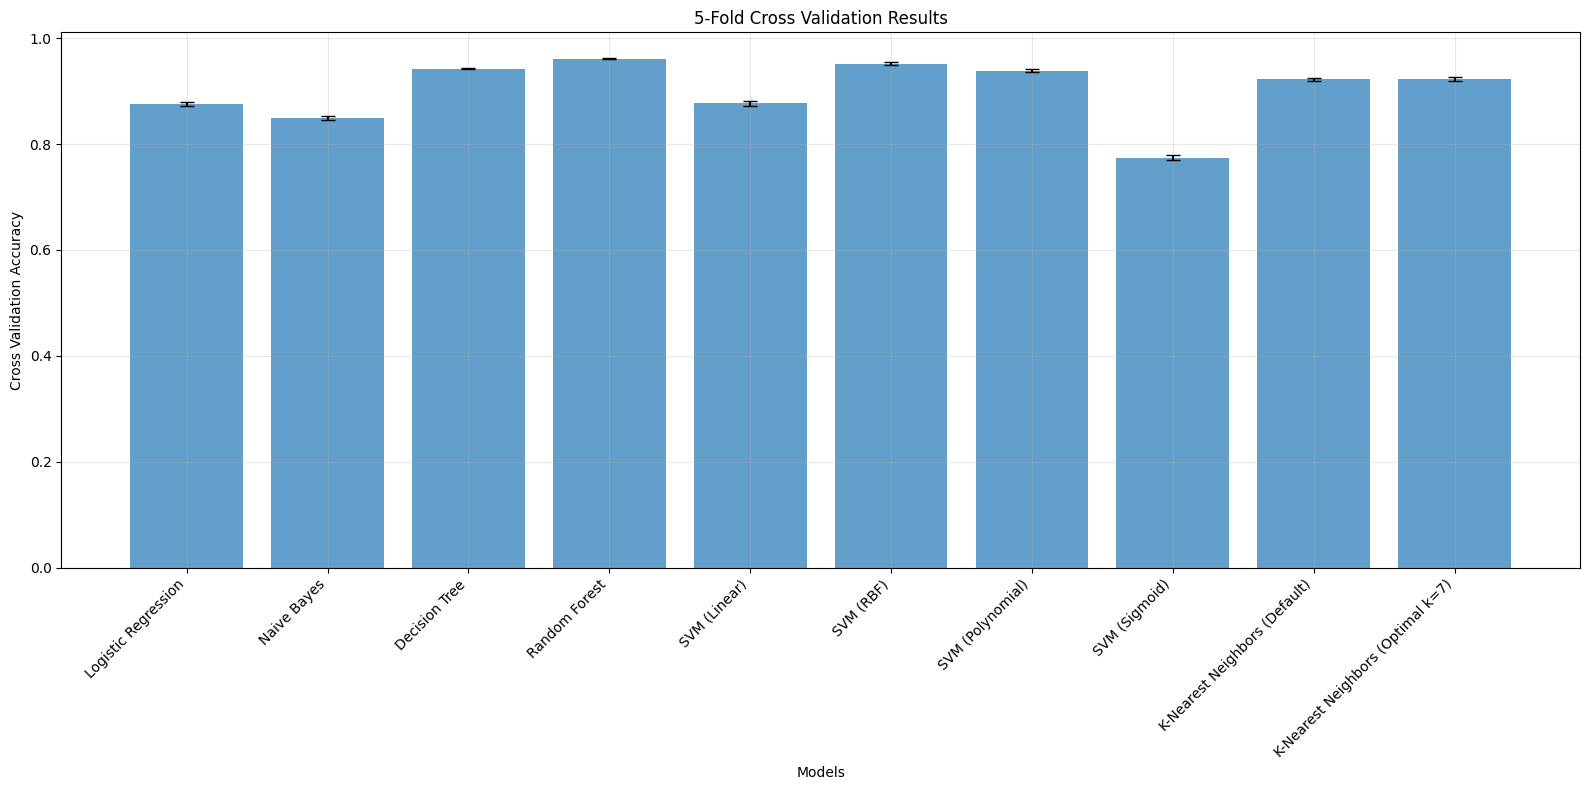

In [57]:
# Evaluate each model using 5-fold cross-validation
cv_scores = {}
cv_folds = 5
kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    cv_scores[name] = scores
    print(f"  CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Plot cross validation results
plt.figure(figsize=(16, 8))
model_names = list(cv_scores.keys())
cv_means = [cv_scores[name].mean() for name in model_names]
cv_stds = [cv_scores[name].std() for name in model_names]

plt.bar(range(len(model_names)), cv_means, yerr=cv_stds, capsize=5, alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Cross Validation Accuracy')
plt.title('5-Fold Cross Validation Results')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

12. Model Training and Testing

In [58]:
# Train each model on full training data
trained_models = {}
predictions = {}
test_accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies[name] = test_accuracy

    print(f"  Test Accuracy: {test_accuracy:.4f}")


Training Logistic Regression...
  Test Accuracy: 0.8755
Training Naive Bayes...
  Test Accuracy: 0.8503
Training Decision Tree...
  Test Accuracy: 0.9432
Training Random Forest...
  Test Accuracy: 0.9608
Training SVM (Linear)...
  Test Accuracy: 0.8776
Training SVM (RBF)...
  Test Accuracy: 0.9498
Training SVM (Polynomial)...
  Test Accuracy: 0.9357
Training SVM (Sigmoid)...
  Test Accuracy: 0.7778
Training K-Nearest Neighbors (Default)...
  Test Accuracy: 0.9221
Training K-Nearest Neighbors (Optimal k=7)...
  Test Accuracy: 0.9229


13. Model Evaluation - Generating Classification Reports and Performance Metrics

In [59]:
# Test each model on holdout test set
classification_reports = {}
performance_metrics = {}

for name in models.keys():
    print(f"\n=== {name} ===")

    report = classification_report(y_test, predictions[name],
                                 target_names=label_encoder.classes_,
                                 output_dict=True)
    classification_reports[name] = report

    print(classification_report(y_test, predictions[name],
                              target_names=label_encoder.classes_))

    performance_metrics[name] = {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }



=== Logistic Regression ===
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.91      0.89     17664
              satisfied       0.87      0.84      0.85     13508

               accuracy                           0.88     31172
              macro avg       0.87      0.87      0.87     31172
           weighted avg       0.88      0.88      0.88     31172


=== Naive Bayes ===
                         precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.87      0.87     17664
              satisfied       0.83      0.82      0.83     13508

               accuracy                           0.85     31172
              macro avg       0.85      0.85      0.85     31172
           weighted avg       0.85      0.85      0.85     31172


=== Decision Tree ===
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     17664
          

14. Performance Metrics Comparison


Performance Metrics Summary:
                                   accuracy  precision  recall  f1_score
Logistic Regression                  0.8755     0.8754  0.8755    0.8752
Naive Bayes                          0.8503     0.8501  0.8503    0.8502
Decision Tree                        0.9432     0.9432  0.9432    0.9432
Random Forest                        0.9608     0.9610  0.9608    0.9608
SVM (Linear)                         0.8776     0.8778  0.8776    0.8771
SVM (RBF)                            0.9498     0.9498  0.9498    0.9497
SVM (Polynomial)                     0.9357     0.9357  0.9357    0.9356
SVM (Sigmoid)                        0.7778     0.7776  0.7778    0.7777
K-Nearest Neighbors (Default)        0.9221     0.9233  0.9221    0.9217
K-Nearest Neighbors (Optimal k=7)    0.9229     0.9243  0.9229    0.9225


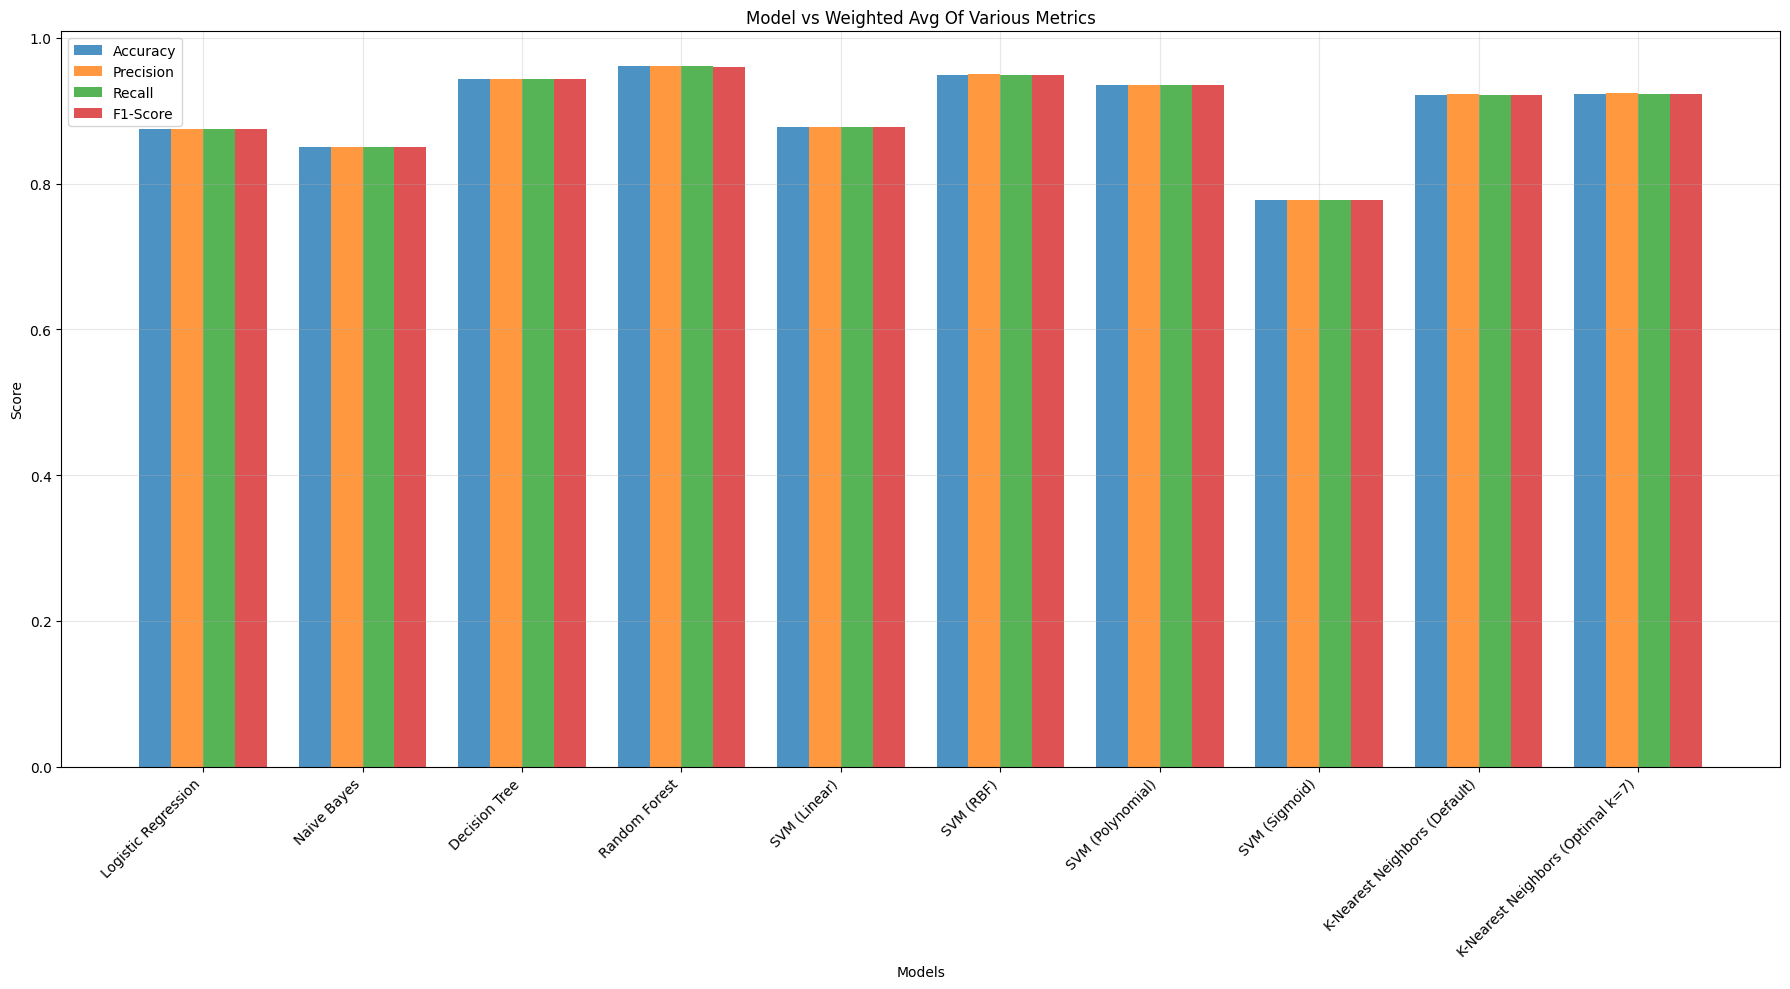

In [60]:
# Compare models across different metrics
metrics_df = pd.DataFrame(performance_metrics).T
print("\nPerformance Metrics Summary:")
print(metrics_df.round(4))

# Plot performance metrics
plt.figure(figsize=(18, 10))
x = np.arange(len(models))
width = 0.2

plt.bar(x - 1.5*width, metrics_df['accuracy'], width, label='Accuracy', alpha=0.8)
plt.bar(x - 0.5*width, metrics_df['precision'], width, label='Precision', alpha=0.8)
plt.bar(x + 0.5*width, metrics_df['recall'], width, label='Recall', alpha=0.8)
plt.bar(x + 1.5*width, metrics_df['f1_score'], width, label='F1-Score', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model vs Weighted Avg Of Various Metrics')
plt.xticks(x, metrics_df.index, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

15. K-Means Clustering Analysis


Finding optimal K using Elbow Method...


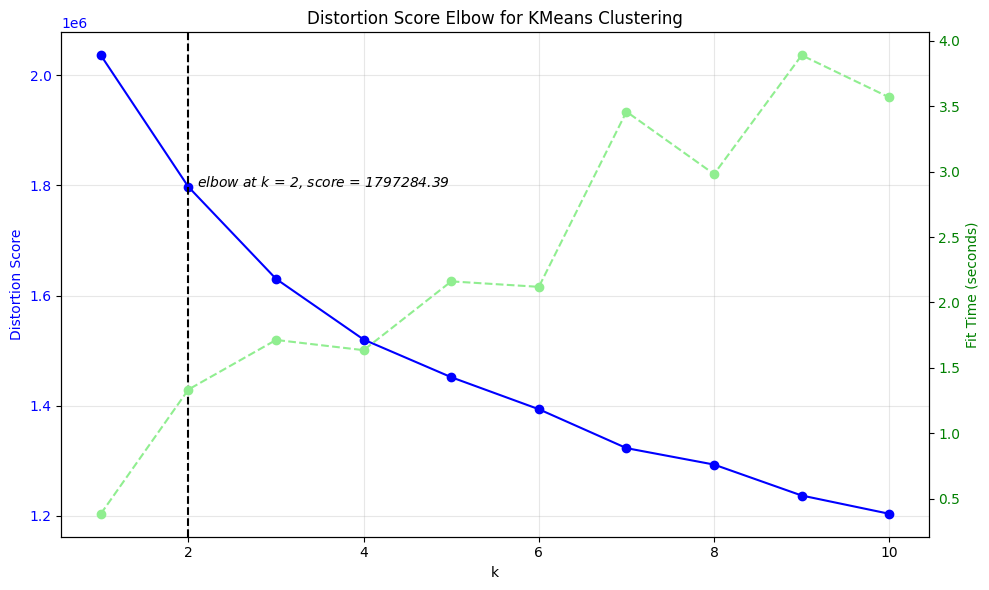


Applying K-Means with k=2...
K-Means clustering accuracy: 0.8340


In [61]:
# Compare models across different metrics
print("Finding optimal K using Elbow Method...")

k_range = range(1, 11)
inertias = []
fit_times = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    start_time = time.time()
    kmeans.fit(X_train_scaled)
    end_time = time.time()

    inertias.append(kmeans.inertia_)
    fit_times.append(end_time - start_time)

# Determine elbow point
elbow_k = 2  # Determined by visual inspection
elbow_score = inertias[elbow_k - 1]

# Plot elbow method
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(k_range, inertias, 'o-', color='blue', label='Distortion Score')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Distortion Score Elbow for KMeans Clustering")
ax1.grid(True, alpha=0.3)
ax1.axvline(x=elbow_k, linestyle='--', color='black')
ax1.text(elbow_k + 0.1, elbow_score + 50, f'elbow at $k$ = {elbow_k}, score = {elbow_score:.2f}',
         fontsize=10, style='italic', color='black')

ax2 = ax1.twinx()
ax2.plot(k_range, fit_times, 'o--', color='lightgreen', label='Fit Time')
ax2.set_ylabel('Fit Time (seconds)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

# Apply K-means with optimal K
optimal_k_means = len(np.unique(y_encoded))
print(f"\nApplying K-Means with k={optimal_k_means}...")

kmeans = KMeans(n_clusters=optimal_k_means, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Evaluate clustering accuracy
kmeans_predictions = kmeans.predict(X_test_scaled)
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)

print(f"K-Means clustering accuracy: {kmeans_accuracy:.4f}")

16. FInding the best model


In [62]:
# Find best performing model
best_model_name = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model_name]

print(f"\nBest performing model: {best_model_name}")
print(f"Best test accuracy: {best_accuracy:.4f}")

# Display top 5 models
sorted_models = sorted(test_accuracies.items(), key=lambda x: x[1], reverse=True)
print("\nTop 5 performing models:")
for i, (name, accuracy) in enumerate(sorted_models[:5], 1):
    print(f"{i}. {name}: {accuracy:.4f}")


Best performing model: Random Forest
Best test accuracy: 0.9608

Top 5 performing models:
1. Random Forest: 0.9608
2. SVM (RBF): 0.9498
3. Decision Tree: 0.9432
4. SVM (Polynomial): 0.9357
5. K-Nearest Neighbors (Optimal k=7): 0.9229


17. Confusion Matrix for Best Model



Confusion Matrix for Best Model (Random Forest)...


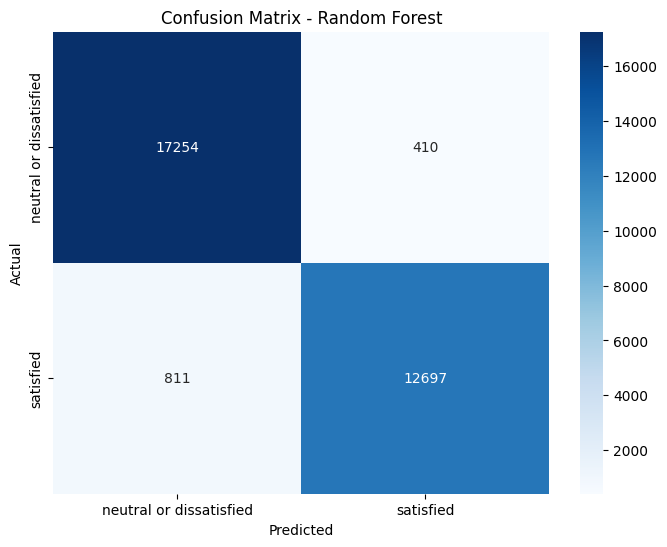

In [63]:
# Show confusion matrix for the best performing model
print(f"\nConfusion Matrix for Best Model ({best_model_name})...")

cm = confusion_matrix(y_test, predictions[best_model_name])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

18. Feature Importance (for tree-based models)


Feature Importance Analysis...
Random Forest Feature Importance:
                              feature  importance
8                     Online boarding    0.145712
3               Inflight wifi service    0.141025
25                     Class_Business    0.082069
23     Type of Travel_Business travel    0.055691
24     Type of Travel_Personal Travel    0.055633
10             Inflight entertainment    0.054412
9                        Seat comfort    0.046384
5              Ease of Online booking    0.040387
26                          Class_Eco    0.036017
2                     Flight Distance    0.031760
21       Customer Type_Loyal Customer    0.029546
11                   On-board service    0.026332
13                   Baggage handling    0.026075
1                                 Age    0.025852
12                   Leg room service    0.025313
14                    Checkin service    0.024333
16                        Cleanliness    0.023683
22    Customer Type_disloyal Custo

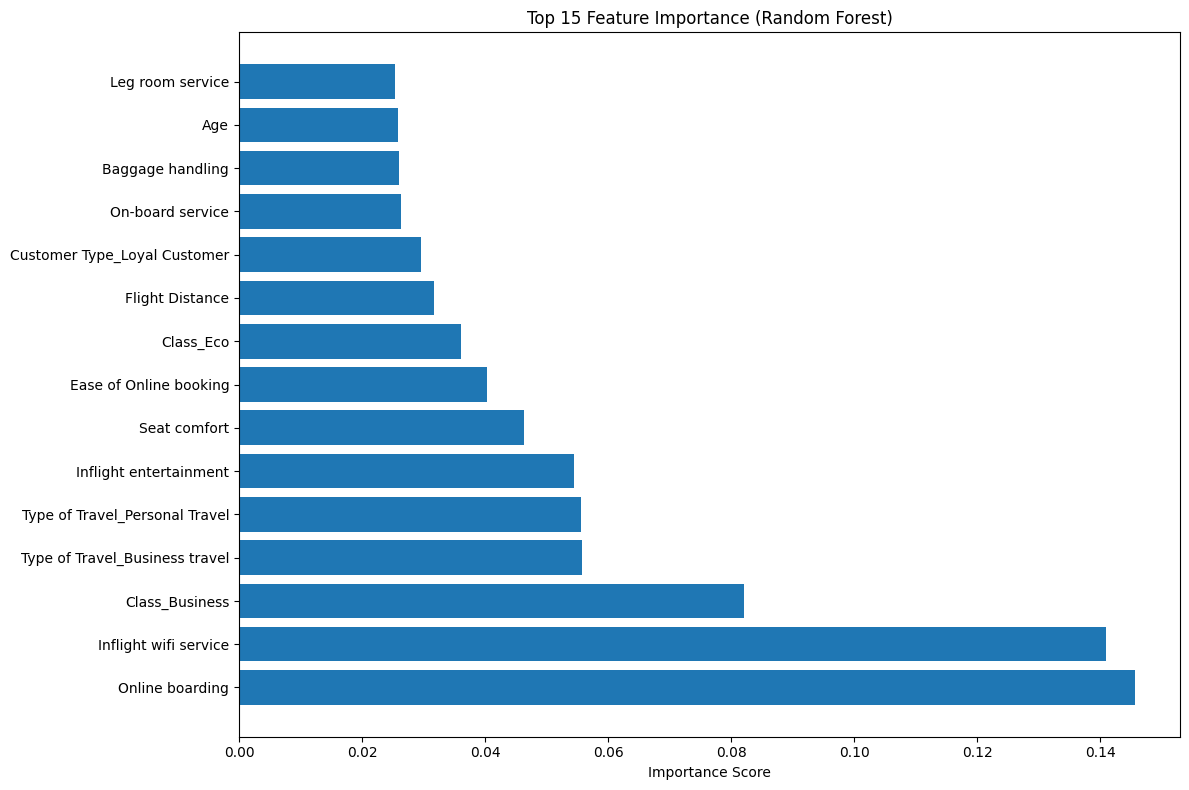

In [64]:
# Print section header for feature importance analysis
print("\nFeature Importance Analysis...")

# Check if Random Forest model exists in our trained models
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

# Display the feature importance table
    print("Random Forest Feature Importance:")
    print(feature_importance)

    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
    plt.title('Top 15 Feature Importance (Random Forest)')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

19. Summary and Deployment Preparation

In [65]:
# Visual separator
print("\n" + "="*60)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*60)

# Display basic dataset information
print(f"\nDataset: Airline Passenger Satisfaction")
print(f"Total samples: {len(df)}")
print(f"Features: {len(X_encoded.columns)}")
print(f"Classes: {len(label_encoder.classes_)} ({', '.join(label_encoder.classes_)})")

# Show KNN optimization results comparing default vs tuned performance
print(f"\nKNN Optimization Results:")
print(f"├── Default k=5 accuracy: {test_accuracies['K-Nearest Neighbors (Default)']:.4f}")
print(f"└── Optimal k={optimal_k} accuracy: {test_accuracies[f'K-Nearest Neighbors (Optimal k={optimal_k})']:.4f}")

# Highlight the best performing model and its accuracy
print(f"\nBest Overall Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Display top 5 models based on cross-validation performance
print(f"\nCross Validation Results (Top 5):")
cv_sorted = sorted([(name, scores.mean()) for name, scores in cv_scores.items()],
                   key=lambda x: x[1], reverse=True)
for i, (name, score) in enumerate(cv_sorted[:5], 1):
    print(f"{i}. {name}: {score:.4f}")

# Show top 5 models based on test set performance
print(f"\nTest Accuracy Results (Top 5):")
for i, (name, accuracy) in enumerate(sorted_models[:5], 1):
    print(f"{i}. {name}: {accuracy:.4f}")

# Compare supervised vs unsupervised approach
print(f"\nK-Means Clustering Accuracy: {kmeans_accuracy:.4f}")

# Present key takeaways from the analysis
print(f"\nKey Insights:")
if 'Random Forest' in trained_models:
    print(f"├── Most important features: {feature_importance.head(3)['feature'].tolist()}")
print(f"└── Supervised learning outperformed unsupervised (K-Means) by {best_accuracy - kmeans_accuracy:.4f}")


COMPREHENSIVE ANALYSIS SUMMARY

Dataset: Airline Passenger Satisfaction
Total samples: 103904
Features: 28
Classes: 2 (neutral or dissatisfied, satisfied)

KNN Optimization Results:
├── Default k=5 accuracy: 0.9221
└── Optimal k=7 accuracy: 0.9229

Best Overall Model: Random Forest
Best Accuracy: 0.9608

Cross Validation Results (Top 5):
1. Random Forest: 0.9614
2. SVM (RBF): 0.9518
3. Decision Tree: 0.9425
4. SVM (Polynomial): 0.9384
5. K-Nearest Neighbors (Optimal k=7): 0.9225

Test Accuracy Results (Top 5):
1. Random Forest: 0.9608
2. SVM (RBF): 0.9498
3. Decision Tree: 0.9432
4. SVM (Polynomial): 0.9357
5. K-Nearest Neighbors (Optimal k=7): 0.9229

K-Means Clustering Accuracy: 0.8340

Key Insights:
├── Most important features: ['Online boarding', 'Inflight wifi service', 'Class_Business']
└── Supervised learning outperformed unsupervised (K-Means) by 0.1268


In [66]:
# Save model artifacts for deployment
import joblib
joblib.dump(trained_models[best_model_name], 'best_airline_model.pkl')
joblib.dump(scaler, 'airline_scaler.pkl')
joblib.dump(label_encoder, 'airline_label_encoder.pkl')

print("\nModel artifacts saved successfully for deployment!")
print("Files saved: best_airline_model.pkl, airline_scaler.pkl, airline_label_encoder.pkl")
print("\n" + "="*60)


Model artifacts saved successfully for deployment!
Files saved: best_airline_model.pkl, airline_scaler.pkl, airline_label_encoder.pkl

